# PRICE ELASTICITY

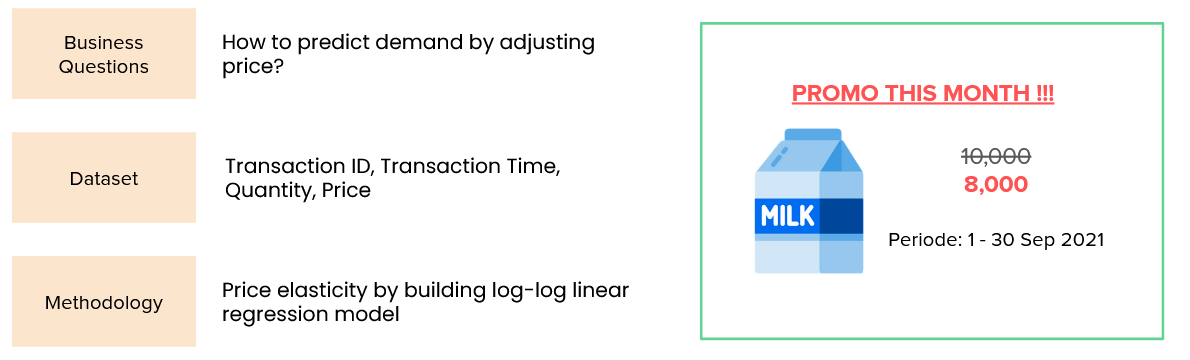

Price elasticity of demand is the ratio of the percentage change in quantity demanded of a product to the percentage change in price


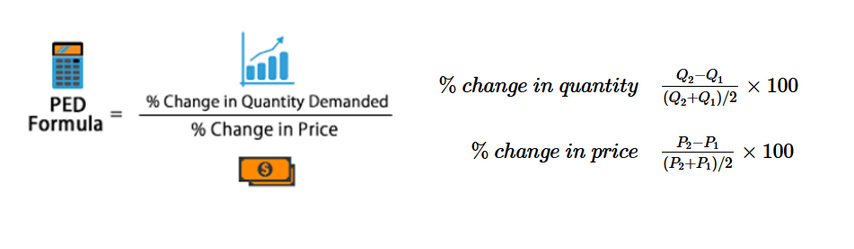

Price Elasticity Type

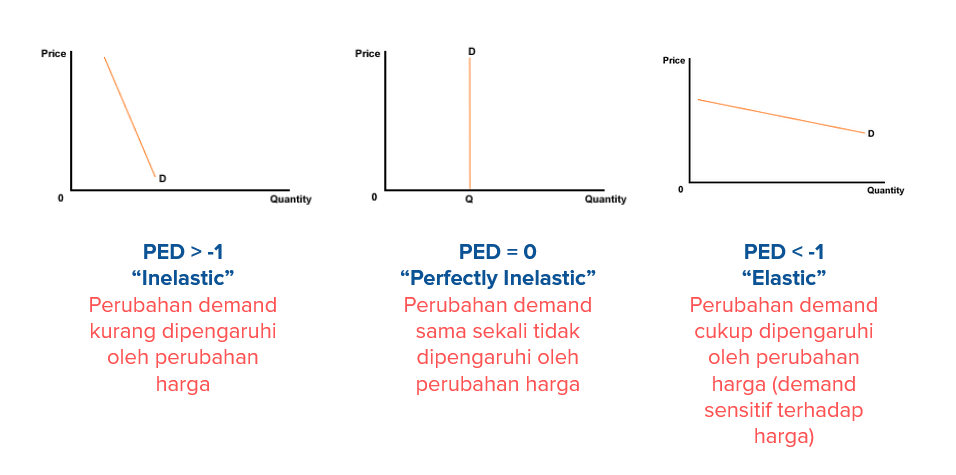

# Load Library

In [1]:
# !pip install pandas==1.3
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# price elasticity
from statsmodels.formula.api import ols

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Preparation

In [3]:
# Run this only when you run the script using google colaboratory
from google.colab import drive
drive.mount('/content/drive')

import os
# adjust the path with your own google drive folder path
os.chdir("/content/drive/My Drive/Webinar/Big Data Analytics")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# download dataset https://www.kaggle.com/carrie1/ecommerce-data
dataset = pd.read_csv("ecommerce_data.csv",encoding= 'unicode_escape')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.850,12680.000,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.100,12680.000,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.150,12680.000,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.150,12680.000,France


# Data Preprocessing

In [5]:
# remove rows that have missing value
dataset = dataset.dropna()

# preprocess datatype and add some new features
dataset["Sales"] = dataset["Quantity"] * dataset["UnitPrice"]
dataset["InvoiceDate"] = pd.to_datetime(dataset["InvoiceDate"])
dataset["CustomerID"] = dataset["CustomerID"].astype("int64")
dataset["InvoiceDate_date"] = dataset["InvoiceDate"].dt.date
dataset["monthyear"] = pd.to_datetime(dataset["InvoiceDate"]).dt.to_period('M').dt.to_timestamp()
dataset = dataset[dataset.Sales>0]

# filter month year period
dataset = dataset[dataset.monthyear<"2011-12"]

# filter country = United Kingdom
dataset = dataset[dataset.Country == "United Kingdom"]

dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceDate_date,monthyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850,United Kingdom,15.300,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,20.340,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850,United Kingdom,22.000,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,20.340,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,20.340,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.250,15444,United Kingdom,5.000,2011-11-30,2011-11-01
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.950,15444,United Kingdom,11.900,2011-11-30,2011-11-01
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.080,15444,United Kingdom,12.480,2011-11-30,2011-11-01
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.950,15444,United Kingdom,7.950,2011-11-30,2011-11-01


# Data Exploration

In [6]:
#  product performance
product = dataset.groupby(["StockCode"]).agg({'InvoiceNo':'nunique','CustomerID':'nunique',
                                              'Quantity':'sum','Sales':'sum',
                                             'UnitPrice':["min","max","mean","nunique"]}).reset_index()
product.columns = ["StockCode","unique_invoice","unique_customer","quantity","sales",
                   "min_price","mean_price","max_price","unique_price"]
product.sort_values("sales",ascending=False).head(10)

,StockCode,unique_invoice,unique_customer,quantity,sales,min_price,mean_price,max_price,unique_price
1286,22423,1372,759,9380,107913.820,4.000,24.960,12.506,5
3227,85123A,1837,815,34010,93152.860,2.400,5.790,2.893,6
1995,23166,166,124,76780,80137.850,1.040,1.250,1.228,2
3213,85099B,1412,555,41006,75517.570,1.650,4.130,2.015,8
2590,47566,1275,656,13914,62723.280,3.750,10.790,4.880,6
3054,84879,1258,630,31453,50396.530,1.450,1.690,1.682,2
1360,22502,223,167,1326,46538.300,2.000,649.500,11.468,4
2744,79321,489,197,9078,43388.890,3.820,12.460,5.412,7
984,22086,847,572,13405,36612.310,2.550,5.790,2.941,3
2100,23284,585,349,5043,33645.720,4.580,16.630,7.897,7


In [8]:
# plot quantity per unitprice
quantity_price = dataset.groupby(["StockCode","UnitPrice"]).agg({"Quantity":"sum","InvoiceDate_date":"nunique"}).reset_index()

# add quantity_per_day and sales_per_Day
quantity_price["quantity_per_day"] = quantity_price["Quantity"] / quantity_price["InvoiceDate_date"]
quantity_price.columns = ["StockCode","UnitPrice","Quantity","unique_date","quantity_per_day"]
quantity_price["sales_per_day"] = quantity_price["quantity_per_day"] * quantity_price["UnitPrice"]

# exclude price with date is lower than 7 days
quantity_price = quantity_price[quantity_price.unique_date>=7]

quantity_price

,StockCode,UnitPrice,Quantity,unique_date,quantity_per_day,sales_per_day
0,10002,0.850,401,29,13.828,11.753
1,10080,0.390,289,19,15.211,5.932
3,10120,0.210,177,23,7.696,1.616
8,10125,0.850,410,34,12.059,10.250
9,10133,0.420,1953,53,36.849,15.477
...,...,...,...,...,...,...
7824,M,0.850,85,13,6.538,5.558
7825,M,1.000,85,13,6.538,6.538
7826,M,1.250,30,16,1.875,2.344
7829,M,1.650,20,9,2.222,3.667


In [9]:
# see price for 1 product
quantity_price[quantity_price.StockCode=="22423"].sort_values("UnitPrice")

,StockCode,UnitPrice,Quantity,unique_date,quantity_per_day,sales_per_day
2906,22423,10.950,6339,156,40.635,444.949
2907,22423,12.750,2979,284,10.489,133.740
2908,22423,24.960,12,9,1.333,33.280


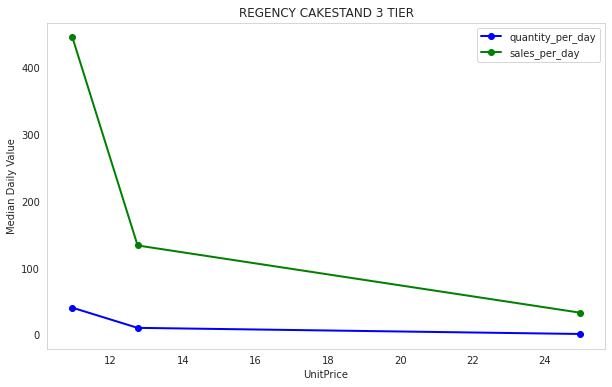

In [10]:
# visualize real quantity
quantity_filter = quantity_price[quantity_price.StockCode=="22423"]
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['axes.grid'] = False
plt.plot( 'UnitPrice', 'quantity_per_day', data=quantity_filter, marker='o', color='blue', linewidth=2)
plt.plot( 'UnitPrice', 'sales_per_day', data=quantity_filter, marker='o', color='green', linewidth=2)
plt.xlabel("UnitPrice")
plt.ylabel("Median Daily Value")
plt.title("REGENCY CAKESTAND 3 TIER")
plt.legend()

# Build a model

In [11]:
# theory: https://www.dummies.com/education/economics/econometrics/econometrics-and-the-log-log-model/
# python code: https://medium.com/@vince.shields913/econometrics-with-python-pt-4-20b7842f01df

# filter a product
data_filter = quantity_price[quantity_price.StockCode=="22423"]

# transform variable to log value and create a model  
reg = ols("np.log(quantity_per_day) ~ np.log(UnitPrice)", data = data_filter).fit()
print(reg.summary())

                               OLS Regression Results                               
Dep. Variable:     np.log(quantity_per_day)   R-squared:                       0.948
Model:                                  OLS   Adj. R-squared:                  0.896
Method:                       Least Squares   F-statistic:                     18.24
Date:                      Sat, 26 Mar 2022   Prob (F-statistic):              0.146
Time:                              12:35:39   Log-Likelihood:               -0.84137
No. Observations:                         3   AIC:                             5.683
Df Residuals:                             1   BIC:                             3.880
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

# Build model for > 1 products

In [12]:
# function to generate model and get price elasticity for a product
def get_price_elasticity(product):
    data_filter = quantity_price[quantity_price.StockCode==product]
    reg = ols("np.log(quantity_per_day) ~ np.log(UnitPrice)", data = data_filter).fit()
    
    if((len(data_filter) > 1) & (~pd.isna(reg.rsquared))):
        summary = pd.read_html(reg.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef'].to_frame().reset_index()
        rsquared = reg.rsquared_adj
        
        if(pd.isna(reg.rsquared_adj)):
            rsquared = reg.rsquared
        summary = summary.append({'index':"rsquared_adj",'coef':rsquared},ignore_index=True).append({'index':"nobs",'coef':reg.nobs},ignore_index=True)
        summary["StockCode"] = product
        summary = summary.pivot_table('coef', "StockCode", 'index').reset_index()
        summary.columns = ["StockCode","intercept","unique_price","elasticity","rsquared_adj"]
        return summary

In [13]:
# create model for top 100 products
product = product.merge(quantity_price[["StockCode"]].drop_duplicates())
product_list = product.sort_values("sales",ascending=False).head(100).StockCode.unique()
result = pd.DataFrame()

for x in range(0,len(product_list)):
    result = result.append(get_price_elasticity(product_list[x]))

result = result.merge(product[["StockCode","sales","quantity","unique_customer"]],
                      on="StockCode").sort_values("sales",ascending=False)
result

,StockCode,intercept,unique_price,elasticity,rsquared_adj,sales,quantity,unique_customer
0,22423,12.503,3.000,-3.821,0.896,107913.820,9380,759
1,85123A,8.973,3.000,-4.854,0.983,93152.860,34010,815
2,23166,9.691,2.000,-31.440,1.000,80137.850,76780,124
3,85099B,9.674,5.000,-8.233,0.772,75517.570,41006,555
4,47566,12.432,4.000,-6.058,0.226,62723.280,13914,656
...,...,...,...,...,...,...,...,...
94,22385,11.639,4.000,-12.734,0.704,12281.790,6615,207
95,15056BL,23.735,2.000,-12.222,1.000,12160.310,2256,112
96,22698,12.113,2.000,-8.883,1.000,12099.400,4364,287
97,22835,13.773,3.000,-7.196,-0.273,12072.050,2597,298


In [14]:
# get max price for each product
max_price = quantity_price.groupby("StockCode").agg({'UnitPrice':'max'}).reset_index()
result = result.merge(max_price)
result = result.merge(quantity_price[["StockCode","UnitPrice","quantity_per_day","sales_per_day"]])
result.columns = ['StockCode', 'intercept', 'unique_price', 'elasticity', 'rsquared_adj',
       'sales', 'quantity', 'unique_customer', 'price',
       'demand','sales_per_day']
result[["StockCode","elasticity","price","demand"]]

,StockCode,elasticity,price,demand
0,22423,-3.821,24.960,1.333
1,85123A,-4.854,5.790,1.625
2,23166,-31.440,1.250,14.521
3,85099B,-8.233,2.080,47.935
4,47566,-6.058,4.950,26.116
...,...,...,...,...
94,22385,-12.734,2.080,14.058
95,15056BL,-12.222,5.950,6.947
96,22698,-8.883,2.950,12.224
97,22835,-7.196,4.950,15.771


# Price Optimization Simulation

In [16]:
# create list in range -100% to 100%
price_opt = [i/100 for i in range(10, 105, 5)]
price_opt.insert(0, 0.01)
neg = [i * -1 for i in price_opt]
price_opt = neg[::-1] + [0] + price_opt
price_opt

[-1.0,
 -0.95,
 -0.9,
 -0.85,
 -0.8,
 -0.75,
 -0.7,
 -0.65,
 -0.6,
 -0.55,
 -0.5,
 -0.45,
 -0.4,
 -0.35,
 -0.3,
 -0.25,
 -0.2,
 -0.15,
 -0.1,
 -0.01,
 0,
 0.01,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0]

In [17]:
# function to calculate optimum price for a product based on their elasticity, price, and demand
def get_simulation_pdemand(row, price_opt) : 

    price = row['price']
    elasticity = row['elasticity']
    demand = row['demand']

    res_increased_price = []
    res_projected_demand = []
    res_increased_demand = []
    res_projected_price = []
    res_projected_sales = []
    for increased_price in price_opt :
        increased_demand = increased_price * elasticity

        projected_demand = demand * (1 + increased_demand)
        projected_price = price * (1 + increased_price)
        projected_sales = projected_price * projected_demand

        res_increased_price.append(increased_price)
        res_projected_demand.append(projected_demand)
        res_increased_demand.append(increased_demand)
        res_projected_price.append(projected_price)
        res_projected_sales.append(projected_sales)

    return res_increased_price, res_projected_demand, res_increased_demand, res_projected_price, res_projected_sales

In [18]:
# calculate optimum price for each product 
simulation = result.apply(lambda x : get_simulation_pdemand(x, price_opt), axis=1, result_type ='expand').rename({
    0 : 'increase_price', 
    1 : 'projected_demand',
    2 : 'increase_demand',
    3 : 'projected_price',
    4 : 'projected_sales'
}, axis=1)

data_output_simulated = pd.concat([result, simulation], axis=1).explode([
    'increase_price',
    'projected_demand',
    'increase_demand',
    'projected_price',
    'projected_sales'
])

In [19]:
# see price optimization for 1 product "22423"
data_output_simulated[data_output_simulated.StockCode=="22423"][["StockCode","increase_price","projected_price","increase_demand","projected_demand","projected_sales"]]

,StockCode,increase_price,projected_price,increase_demand,projected_demand,projected_sales
0,22423,-1.000,0.000,3.821,6.428,0.000
0,22423,-0.950,1.248,3.630,6.174,7.705
0,22423,-0.900,2.496,3.439,5.919,14.774
0,22423,-0.850,3.744,3.248,5.664,21.207
0,22423,-0.800,4.992,3.057,5.409,27.004
0,22423,-0.750,6.240,2.866,5.155,32.165
0,22423,-0.700,7.488,2.675,4.900,36.690
0,22423,-0.650,8.736,2.484,4.645,40.580
0,22423,-0.600,9.984,2.293,4.390,43.833
0,22423,-0.550,11.232,2.102,4.136,46.451


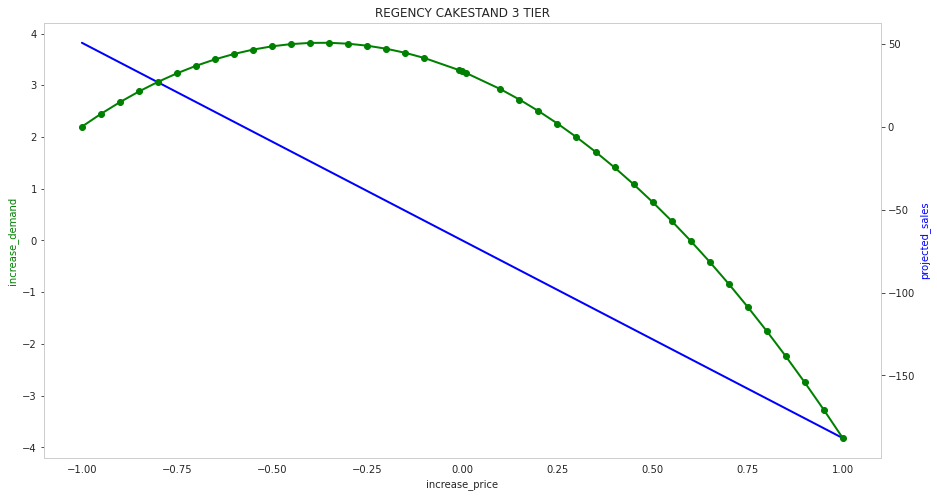

In [20]:
# filter 1 product and visualize the simulation
data_simulation = data_output_simulated[data_output_simulated.StockCode=="22423"]

plt.rcParams["figure.figsize"] = (15,8)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot( 'increase_price', 'increase_demand', data=data_simulation, marker='', color='blue', linewidth=2)
ax2.plot( 'increase_price', 'projected_sales', data=data_simulation, marker='o', color='green', linewidth=2)
ax1.set_xlabel('increase_price')
ax1.set_ylabel('increase_demand', color='g')
ax2.set_ylabel('projected_sales', color='b')
plt.title("REGENCY CAKESTAND 3 TIER")
plt.show()

In [21]:
# get optimum price per product
idx = data_output_simulated.groupby(['StockCode'])['projected_sales'].transform(max) == data_output_simulated['projected_sales']
data_output_optimal = data_output_simulated[idx]
data_output_optimal

col = ['StockCode','elasticity','sales','sales_per_day','projected_price', 'increase_price','increase_demand','projected_demand','projected_sales']
elasticity_by_product = data_output_optimal[col]
elasticity_by_product.rename({
    'projected_price' : 'optimum_price',
    'sales' : 'total_historical_sales'
}, axis=1, inplace=True)

elasticity_by_product[["StockCode","elasticity","optimum_price","increase_price","projected_sales","total_historical_sales"]].head(20)

,StockCode,elasticity,optimum_price,increase_price,projected_sales,total_historical_sales
0,22423,-3.821,16.224,-0.350,50.564,107913.820
1,85123A,-4.854,3.474,-0.400,16.607,93152.860
2,23166,-31.440,0.625,-0.500,151.748,80137.850
3,85099B,-8.233,1.144,-0.450,258.005,75517.570
4,47566,-6.058,2.970,-0.400,265.507,62723.280
5,84879,-9.819,0.929,-0.450,347.800,50396.530
6,22502,-7.747,3.273,-0.450,96.893,46538.300
7,79321,-3.093,8.099,-0.350,31.324,43388.890
8,22086,-2.652,4.053,-0.300,77.814,36612.310
9,23284,-2.623,11.641,-0.300,51.999,33645.720
